In [3]:
# Install pip packages in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib==3.0.3
# !{sys.executable} -m pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

######### jupyter notebook anaconda 가상화면 하는법 ########

# 인공지능 비트 트레이더 경진대회 시즌 2 EDA
## 데이터 이해
**1. train_x_df.csv (10572180, 12)**  
임의의 시점 부터 2021년 1월 31일까지 9가지 종류의 암호화폐의 분단위 가격정보를 가공한 데이터  
  
**2. train_y_df.csv (919320, 12)**  
임의의 시점 부터 2021년 1월 31일까지 9가지 종류의 암호화폐의 분단위 가격정보를 가공한 데이터  
  
**3.test_x_df.csv (738300, 12)**  
2021년 2월 1일 부터 임의의 시점까지 9가지 종류의 암호화폐의 분단위 가격정보를 가공한 데이터  
  
  
이 중 일부 데이터를 public 점수를 계산하고, 다른 일부 데이터를 private 점수 계산하는데 사용합니다.  
  

**4.sample_submission.csv (535, 3)**  
test_x_df에는 535가지 sample_id가 존재하고 각 sample_id는 1380분 동안의 가격 변동 정보를 포함합니다.  
buy_quantity : 현재 보유량 대비 샘플의 매수량 (0 ~ 1)  
sell_time : 샘플의 매도 시각. (0~ 119분 사이의 정수)  
  
  
  
**컬럼 설명**  
  
sample_id : 개별 샘플의 인덱스  
time : x_df는 0분 ~ 1379분, y_df는 0분 ~ 119분의 값을 갖습니다. 동일한 샘플 내 시간 정보  
coin_index : 10가지 종류의 코인에 대한 비식별화 인덱스 (0 ~9)  
open : open price  
high : high price  
low : low price  
close : close price  
volume : 거래량  
quote_av : quote asset volume  
trades : 거래 건 수  
tb_base_av : taker buy base asset volume  
tb_quote_av : taker buy quote asset volume  
  
  
  
**비트코인을 모르는 나를 위한 칼럼 상세**  
*★ 거래량*  
\- 특정 시간내에 특정 자산군의 지분이 거래되는 수치를 보여준다.  
\- 거래량은 시장의 움직임에 대하여 상대적 중요성을 측정해준다.  
\- 가격의 변동의 과정속에 거래량이 급증하면 거래량이 적을때 보다 더 신뢰도가 높다.  
  
   
*★ quote asset vloume*: 주문총량  
   
   
*★ tb_base_av*  
taker = buyer  
maker = seller  
base asset = buyer이 받은 코인 수  
volume = total amount of traded coins  
  
Taker buy base asset vloume: 구매자가 받은 코인이 수 총 합계  
참고) 'Volume' - ' Taker buy base asset volume' = ' Maker buy base asset volume'  
  
  
*★ tb_quote_av*  
구매자가 주문한 수

거래량: https://coinpick.com/chart_volume/3255  
tb_base_av: https://www.moneynet.co.kr/index.php?mid=free_board&term=m&date_start=20170619&date_end=20170626&page=4&document_srl=41424549&listStyle=viewer

In [44]:
print(train_x_df[['volume', 'quote_av']].mean())

volume      776117.742572
quote_av     47926.501764
dtype: float64


In [46]:
print(train_x_df[['tb_base_av', 'tb_quote_av']].mean())

tb_base_av     370669.804412
tb_quote_av     23687.288688
dtype: float64


vloum: 원화 quote_av: 코인화 인것이 다르다.  
-> 비트코인이 얼마나 거래되었는지/ 몇번 주문을 했는지(얼만큼의 거래인지는 모르지만)

## 데이터 전처리

In [4]:
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 라인
%matplotlib inline

# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 함
import os
os.getcwd() # 현재 디렉토리 파악
os.chdir(r"C:\Users\yeahaluu\[STUDY] Data Science\Dacon_bitcoin_경진대회\open") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

In [5]:
# matplotlib가 한글폰트 지원하지 않아 깨지는 현상 처리
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [6]:
train_x_df = pd.read_csv("train_x_df.csv", encoding='utf-8')
train_x_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,9,0.983614,0.983614,0.983128,0.983246,0.001334,10.650987,0.009855,0.000848,6.771755
1,0,1,9,0.983245,0.983612,0.982453,0.982693,0.001425,11.375689,0.016137,0.000697,5.565188
2,0,2,9,0.982694,0.983612,0.982403,0.983002,0.001542,12.301942,0.014166,0.000905,7.225459
3,0,3,9,0.983009,0.984848,0.983009,0.984486,0.002520,20.134695,0.021557,0.001171,9.353000
4,0,4,9,0.984233,0.984606,0.983612,0.984164,0.002818,22.515448,0.021434,0.001799,14.372534


In [7]:
# 데이터 shape파악 (행과 열의 개수)
train_x_df.shape

(10572180, 12)

In [8]:
# 데이터 기초통계량 파악
train_x_df.describe()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
count,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07,1.057218e+07
mean,3.830000e+03,6.895000e+02,5.456729e+00,1.000650e+00,1.001450e+00,9.998227e-01,1.000642e+00,7.761177e+05,4.792650e+04,1.261575e+02,3.706698e+05,2.368729e+04
std,2.211540e+03,3.983716e+02,2.943867e+00,4.027305e-02,4.032254e-02,4.022103e-02,4.024325e-02,9.201730e+06,2.461396e+05,5.192760e+02,5.188063e+06,1.279145e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,8.903663e-02,5.540227e-01,8.903663e-02,5.540227e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.915000e+03,3.447500e+02,4.000000e+00,9.865683e-01,9.873150e-01,9.858038e-01,9.865824e-01,6.036940e-02,3.364670e+01,8.322930e-02,6.927575e-03,1.156383e+01
50%,3.830000e+03,6.895000e+02,6.000000e+00,1.000000e+00,1.000500e+00,9.993641e-01,9.999900e-01,3.708659e+00,3.692633e+02,8.632804e-01,1.167656e+00,1.318855e+02
75%,5.745000e+03,1.034250e+03,8.000000e+00,1.012913e+00,1.013659e+00,1.012141e+00,1.012891e+00,4.461639e+04,1.351256e+04,5.891339e+01,9.740486e+03,5.306334e+03
max,7.660000e+03,1.379000e+03,9.000000e+00,2.066901e+00,4.451831e+00,2.066901e+00,2.066901e+00,7.398036e+09,4.957759e+07,6.257862e+04,7.340513e+09,2.320023e+07


In [9]:
train_x_df.count()

sample_id      10572180
time           10572180
coin_index     10572180
open           10572180
high           10572180
low            10572180
close          10572180
volume         10572180
quote_av       10572180
trades         10572180
tb_base_av     10572180
tb_quote_av    10572180
dtype: int64

In [10]:
# 결측치 개수 파악
# 셀 실행 결과를 데이터프레임으로 보고 싶을 때 to_frame()과 pd.DataFrame() 두 가지를 사용 가능
train_x_df.isnull().sum().to_frame('nan_count')

,nan_count
sample_id,0
time,0
coin_index,0
open,0
high,0
low,0
close,0
volume,0
quote_av,0
trades,0


결측치가 0이라니...!  
아무튼 결측치에 대한 전처리 pass

In [11]:
# 변수 타입 파악 (굳이 안 해도 될지도...누가봐도 int or float)
train_x_df.dtypes

sample_id        int64
time             int64
coin_index       int64
open           float64
high           float64
low            float64
close          float64
volume         float64
quote_av       float64
trades         float64
tb_base_av     float64
tb_quote_av    float64
dtype: object

## 데이터 Segmentation  
  
- 식별(sample_id, coin_index)  
- 시간(time)
- 가격(open, high, low, close)
- 거래, 주문량들(volume, quote_av, trades, tb_base_av, tb_quote_av)
  
  
### 가설
- 한 타임 전의 거래건수, 거래량(volume), 주문량(quote_av)이 늘어나면 그 다음 타임의 가격(high, open 등)이 오르지 않을까?
- 시계열 데이터의 일정한 추세가 있지 않을까? 그 추세를 이용해 코인을 사고 팔면 돈을 벌 수 있지 않을까?
- 그 코인의 high - open 을 구해 이정도쯤 올랐을때 상한가라고 추측해서 팔면 괜찮지 않을까?
- 양을 어떻게 정하지? --> 으으.. 이거 추세분석

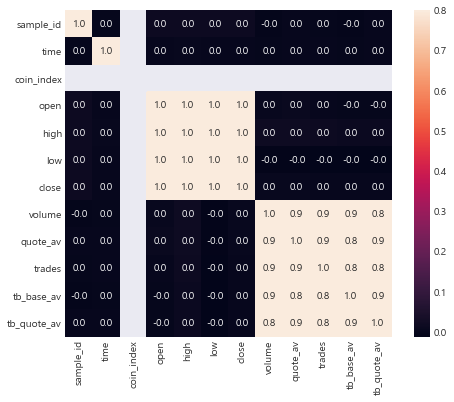

In [39]:
# 상관관계분석
# 전체 데이터셋 히트맵
def draw_corrmat(df):
  y_corrmat = df.corr()
  f, ax = plt.subplots(figsize=(8,6))
  sns.heatmap(y_corrmat, vmax=.8, annot=True, fmt='.1f', square=True);
  
draw_corrmat(coin9_train_x_df)

## volume 데이터에 대해?

In [17]:
train_x_df['volume'].describe()

count    1.057218e+07
mean     7.761177e+05
std      9.201730e+06
min      0.000000e+00
25%      6.036940e-02
50%      3.708659e+00
75%      4.461639e+04
max      7.398036e+09
Name: volume, dtype: float64

In [48]:
# coin_index = 9 만 들고오기
sample0 = train_x_df['sample_id']==0
sample0_train_x_df = train_x_df[sample0]
smaple0_train_x_df.head()

NameError: name 'smaple0_train_x_df' is not defined

In [50]:
sample0_train_x_df.tail()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
1375,0,1375,9,0.999015,0.999388,0.998400,0.998400,0.002577,20.899395,0.017492,0.001371,11.117771
1376,0,1376,9,0.998400,0.999260,0.998400,0.999016,0.001256,10.188805,0.011333,0.000556,4.510879
1377,0,1377,9,0.999018,0.999629,0.998936,0.999629,0.002902,23.543552,0.014289,0.001761,14.289263
1378,0,1378,9,0.999629,1.000116,0.999143,1.000000,0.004383,35.568905,0.020941,0.002810,22.806458
1379,0,1379,9,1.000000,1.000123,0.999388,0.999998,0.001269,10.297554,0.014782,0.000909,7.376117


In [49]:
sample0_train_x_df.count()

sample_id      1380
time           1380
coin_index     1380
open           1380
high           1380
low            1380
close          1380
volume         1380
quote_av       1380
trades         1380
tb_base_av     1380
tb_quote_av    1380
dtype: int64

<AxesSubplot:xlabel='time', ylabel='volume'>

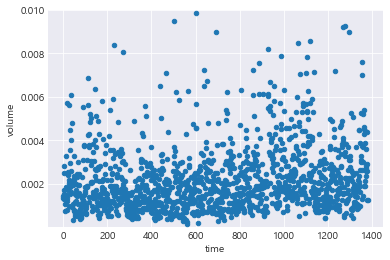

In [55]:
# scatter plot volume/time
var = 'time'
data = pd.concat([coin9_train_x_df['volume'], coin9_train_x_df[var]], axis=1)
data.plot.scatter(x=var, y='volume', ylim=(0.00001, 0.01))

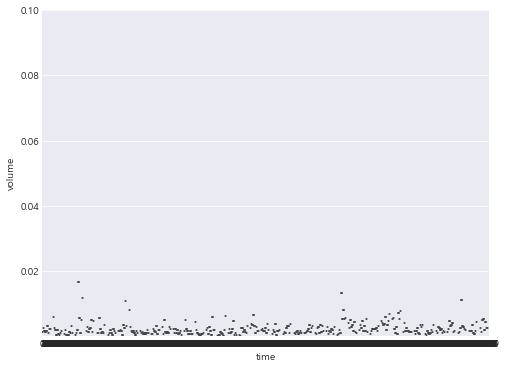

In [56]:
#box plot overallqual/saleprice
var = 'time'
data = pd.concat([coin9_train_x_df['volume'], coin9_train_x_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="volume", data=data)
fig.axis(ymin=0.0001, ymax=0.1);

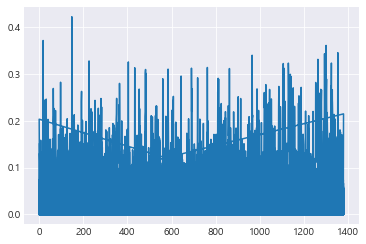

In [43]:
x_values = coin9_train_x_df['time']
y_values = coin9_train_x_df['volume']
plt.plot(x_values, y_values)
plt.show()

https://yganalyst.github.io/data_handling/Pd_5/  
